Se plantea realizar una interpolación para determinar las dimensiones (L1, L2 y L3) de un mecanismo para un segmento rectilineo de 20 cm, con un rango aungular de 30 y 55 grados de giro de la manivela. 

Construir un paso a paso es esencial  para el desarrollo del problema, así que se hará de la siguiente forma: 
1. Construir la tabla de datos en excel y cargarla a python.
2. Identificar las librerias a utilizar.
3. Explicar la nomenclaruta utilizada para subir la tabla.
4. Aplicar al menos dos metodos de interpolacion acorde con los datos. 
5. Evaluar  el rendimiento de cada uno de los metodos de interpolación.
6. Realizar comparacion entre los diferentes metodos de  interpolación.
7. Generar conclusiones.

In [1]:
import pandas as pd
archivo_excel = 'C:/Users/esteb/OneDrive/Documents/Maestria/I/Programacion/Trabajos/I/Repositorio/Datos.xlsx'
datos = pd.read_excel(archivo_excel)
datos.head()

C:\Users\esteb\AppData\Local\Temp\ipykernel_17512\3062761686.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
0,20,170,0.056,1.000000e-08,0.0038,1.436,2.975,3.963,0.601,0.00006,0.00137,1.045,2.075,2.613,0.480
1,40,160,0.111,4.000000e-08,0.0153,1.504,2.950,3.925,1.193,0.00038,0.00274,1.124,2.050,2.575,0.950
2,60,150,0.167,2.700000e-06,0.0348,1.565,2.900,3.850,1.763,0.00106,0.00387,1.178,2.025,2.538,1.411
3,80,140,0.222,1.000000e-05,0.0627,1.611,2.825,3.738,2.299,0.00340,0.00503,1.229,1.975,2.463,1.845
4,100,130,0.278,4.000000e-05,0.0990,1.646,2.725,3.588,2.790,0.00910,0.00640,1.275,1.900,2.350,2.237


Una forma que encontré para subir facilmente los datos fue nombrando las filas de la "a" a la "o" de la siguinete forma:

In [2]:
from PIL import Image
ruta_imagen = ruta_imagen = r"C:\Users\esteb\OneDrive\Documents\Maestria\I\Programacion\Trabajos\I\Repositorio\Imagen_tabla.png"
imagen_tabla = Image.open(ruta_imagen)
imagen_tabla.show()

Cuando se nombre alguna letra de la tabla en este trabajo será util ver la imagen de la tabla con la nomenclatura. 

Los valores de "x" y "y" en el contexto de la interpolación representan los puntos conocidos en los que se tiene información sobre la relación entre dos variables. 
"x" representa la variable independiente y "y" representa la variable dependiente. 

Los métodos de interpolación que se van a utilizar son los siguientes: 
1. Lagrange: Es una técnica utilizada para construir un polinomio que pasa a través de un conjunto dado de puntos de datos. Es útil cuando se desea aproximar una función desconocida a partir de valores discretos conocidos. Este método se basa en la idea de que un polinomio de grado n puede ser completamente determinado por n+1 puntos en un plano cartesiano.
2. Splines: Es una técnica utilizada para construir una curva suave que pasa a través de un conjunto dado de puntos de datos. A diferencia de otros métodos de interpolación que utilizan un solo polinomio para conectar todos los puntos, los Splines dividen el dominio en segmentos más pequeños y utilizan polinomios de bajo grado para interpolar en cada segmento.
3. Interpolación por ajuste de curvas: Es una técnica utilizada para aproximar una función desconocida a partir de un conjunto de puntos de datos. A diferencia de la interpolación polinómica, donde se busca un polinomio que pase exactamente por todos los puntos, el ajuste de curvas busca encontrar una función continua que se aproxime lo mejor posible a los datos, sin necesariamente pasar a través de ellos.

--- ¿Por qué se escogieron estos métodos?
--- Despues de analisar los datos de la tabla, se observó que los datos eran pocos y que al graficarlos seguian una tendencia, estos métodos funcionan bien con las caracteristicas mencionadas. 

Se comenzará a trabajar con el criterio de rectitud.
La variable independiente será el rango angular que en nuestra tabla será "a", las variables dependientes serán "g", "h", "i". 

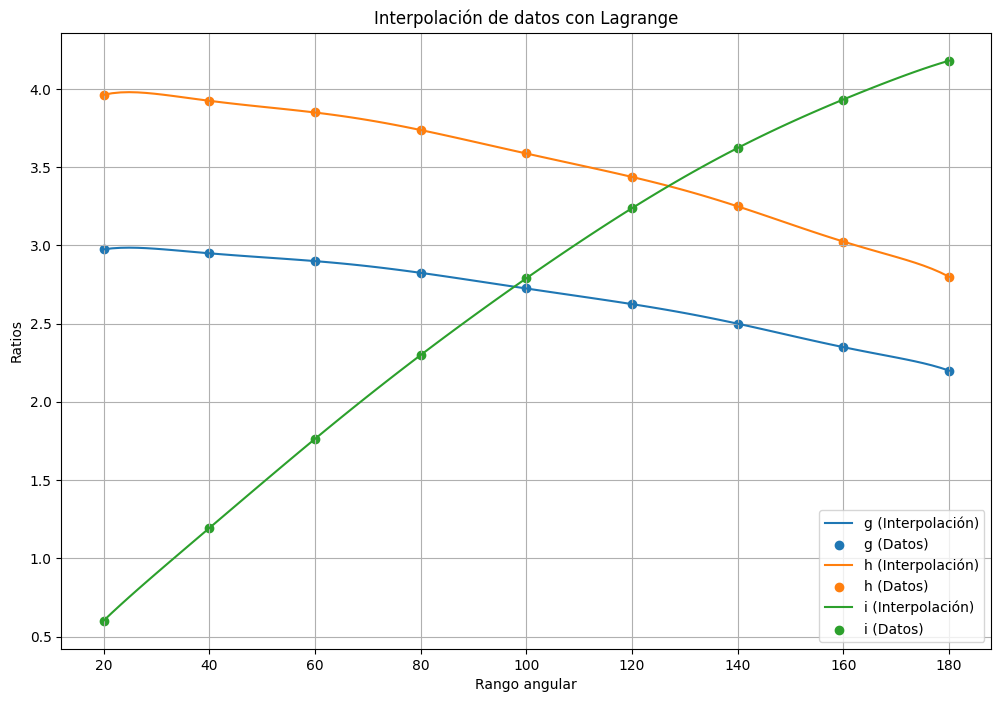

Resultados de la interpolación en 30 y 55:
Columna: g
Valor interpolado en 30: 2.978606414795612
Valor interpolado en 55: 2.9128142565514437

Columna: h
Valor interpolado en 30: 3.9687366027835975
Valor interpolado en 55: 3.8690580493202815

Columna: i
Valor interpolado en 30: 0.9045451049807252
Valor interpolado en 55: 1.6223491523298776



In [26]:
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import numpy as np

x = datos['a'].tolist()

columnas_interp = ['g', 'h', 'i']

x_interp = np.linspace(min(x), max(x), 100)

plt.figure(figsize=(12, 8))

resultados_interpolacion = {}

for columna in columnas_interp:
    y = datos[columna].tolist()
    
    
    polinomio_lagrange = lagrange(x, y)
    
    
    y_interp = polinomio_lagrange(x_interp)
    
    valor_interpolado_30 = polinomio_lagrange(30)
    valor_interpolado_55 = polinomio_lagrange(55)
    
    resultados_interpolacion[columna] = {
        'Interpolación': y_interp,
        'Interpolado en 30': valor_interpolado_30,
        'Interpolado en 55': valor_interpolado_55
    }
    
    
    plt.plot(x_interp, y_interp, label=f'{columna} (Interpolación)')
    plt.scatter(x, datos[columna], label=f'{columna} (Datos)')

plt.xlabel('Rango angular')
plt.ylabel('Ratios')
plt.title('Interpolación de datos con Lagrange')
plt.legend()
plt.grid(True)
plt.show()

print("Resultados de la interpolación en 30 y 55:")
for columna, resultados in resultados_interpolacion.items():
    print(f"Columna: {columna}")
    print(f"Valor interpolado en 30: {resultados['Interpolado en 30']}")
    print(f"Valor interpolado en 55: {resultados['Interpolado en 55']}")
    print()

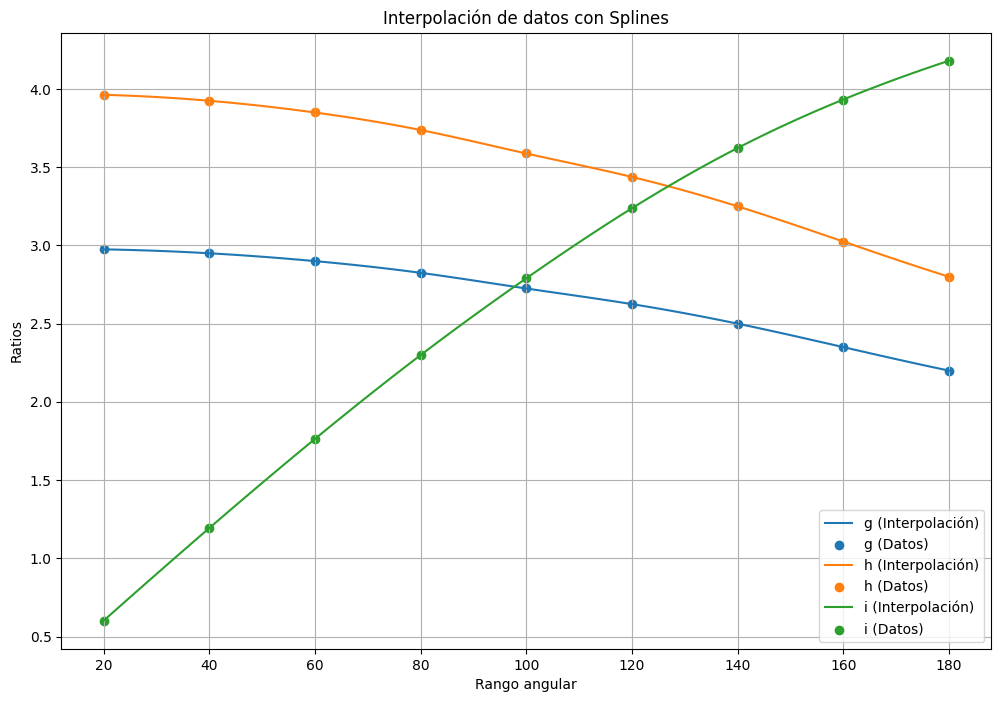

Resultados de la interpolación en 30 y 55:
Columna: g
Valor interpolado en 30: 2.9658032852564102
Valor interpolado en 55: 2.914687750400641

Columna: h
Valor interpolado en 30: 3.948917708333333
Valor interpolado en 55: 3.8719626302083334

Columna: i
Valor interpolado en 30: 0.8990685897435899
Valor interpolado en 55: 1.623158733974359



In [27]:
from scipy.interpolate import CubicSpline

x = datos['a'].tolist()

# Columnas para interpolar
columnas_interp = ['g', 'h', 'i']

# Definir x_interp
x_interp = np.linspace(min(x), max(x), 100)

plt.figure(figsize=(12, 8))

# Diccionario para almacenar los resultados de la interpolación en 30 y 55
resultados_interpolacion = {}

for columna in columnas_interp:
    y = datos[columna].tolist()
    
    # Realizar interpolación de Splines cúbicos
    spline = CubicSpline(x, y)
    
    # Evaluar la interpolación en los puntos de x_interp
    y_interp = spline(x_interp)
    
    # Evaluar la interpolación en los puntos de 30 y 55
    valor_interpolado_30 = spline(30)
    valor_interpolado_55 = spline(55)
    
    resultados_interpolacion[columna] = {
        'Interpolación': y_interp,
        'Interpolado en 30': valor_interpolado_30,
        'Interpolado en 55': valor_interpolado_55
    }
    
    # Graficar los resultados
    plt.plot(x_interp, y_interp, label=f'{columna} (Interpolación)')
    plt.scatter(x, datos[columna], label=f'{columna} (Datos)')

plt.xlabel('Rango angular')
plt.ylabel('Ratios')
plt.title('Interpolación de datos con Splines')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir resultados de interpolación en 30 y 55
print("Resultados de la interpolación en 30 y 55:")
for columna, resultados in resultados_interpolacion.items():
    print(f"Columna: {columna}")
    print(f"Valor interpolado en 30: {resultados['Interpolado en 30']}")
    print(f"Valor interpolado en 55: {resultados['Interpolado en 55']}")
    print()

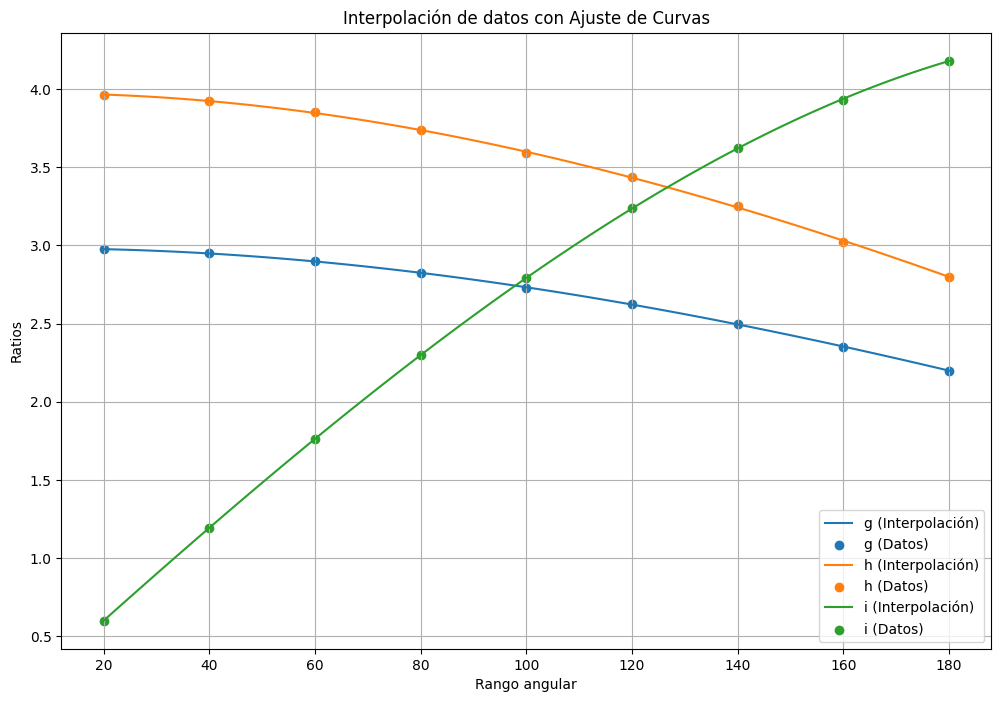

Resultados de la interpolación en 30 y 55:
Columna: g
Valor interpolado en 30: 2.9654694264069272
Valor interpolado en 55: 2.912434895833335

Columna: h
Valor interpolado en 30: 3.948473755411255
Valor interpolado en 55: 3.8688828125000008

Columna: i
Valor interpolado en 30: 0.8997658279220785
Valor interpolado en 55: 1.6233606770833342



In [28]:
x = datos['a'].tolist()

# Columnas para interpolar
columnas_interp = ['g', 'h', 'i']

# Definir x_interp
x_interp = np.linspace(min(x), max(x), 100)

plt.figure(figsize=(12, 8))

# Diccionario para almacenar los resultados de la interpolación en 30 y 55
resultados_interpolacion = {}

for columna in columnas_interp:
    y = datos[columna].tolist()
    
    # Realizar ajuste de curvas
    coeficientes = np.polyfit(x, y, deg=3)  # Ajuste de un polinomio de grado 3 (cúbico)
    
    # Generar la función ajustada
    funcion_ajustada = np.poly1d(coeficientes)
    
    # Evaluar la función ajustada en los puntos de x_interp
    y_interp = funcion_ajustada(x_interp)
    
    # Evaluar la función ajustada en los puntos de 30 y 55
    valor_interpolado_30 = funcion_ajustada(30)
    valor_interpolado_55 = funcion_ajustada(55)
    
    resultados_interpolacion[columna] = {
        'Interpolación': y_interp,
        'Interpolado en 30': valor_interpolado_30,
        'Interpolado en 55': valor_interpolado_55
    }
    
    # Graficar los resultados
    plt.plot(x_interp, y_interp, label=f'{columna} (Interpolación)')
    plt.scatter(x, datos[columna], label=f'{columna} (Datos)')

plt.xlabel('Rango angular')
plt.ylabel('Ratios')
plt.title('Interpolación de datos con Ajuste de Curvas')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir resultados de interpolación en 30 y 55
print("Resultados de la interpolación en 30 y 55:")
for columna, resultados in resultados_interpolacion.items():
    print(f"Columna: {columna}")
    print(f"Valor interpolado en 30: {resultados['Interpolado en 30']}")
    print(f"Valor interpolado en 55: {resultados['Interpolado en 55']}")
    print()

A simple vista se evidencia que los métodos de Splines y Ajuste de curvas son los más indicados para la interpolación de los datos dados. 
Para confirmar se procede a calcular el error cuádrito medio (ECM) que es una medida comúnmente utilizada para evaluar la precisión de un modelo predictivo o de ajuste en estadística y aprendizaje automático. Este error cuantifica la discrepancia promedio entre los valores predichos por un modelo y los valores reales o observados en un conjunto de datos.

In [23]:
from scipy.interpolate import lagrange, CubicSpline
import numpy as np

# Suponiendo que tienes tus datos en x y y

# Interpolación de Lagrange
polinomio_lagrange = lagrange(x, y)
y_interp_lagrange = polinomio_lagrange(x)
ecm_lagrange = np.mean((y - y_interp_lagrange)**2)

# Interpolación de Splines cúbicos
spline_cubico = CubicSpline(x, y)
y_interp_spline = spline_cubico(x)
ecm_spline = np.mean((y - y_interp_spline)**2)

# Ajuste de curvas
coeficientes = np.polyfit(x, y, deg=3)  # Ajuste de un polinomio de grado 3 (cúbico)
funcion_ajustada = np.poly1d(coeficientes)
y_interp_curva = funcion_ajustada(x)
ecm_curva = np.mean((y - y_interp_curva)**2)

print(f"ECM para Lagrange: {ecm_lagrange}")
print(f"ECM para Splines cúbicos: {ecm_spline}")
print(f"ECM para ajuste de curvas: {ecm_curva}")

ECM para Lagrange: 2.5178936891099596e-20
ECM para Splines cúbicos: 0.0
ECM para ajuste de curvas: 4.9115760782434554e-06


Se evidencia que los tres métodos se ajustan muy bien a los datos, destacando el método de Lagrange y el método de Splines.
El método de Splines muestra mayor suavidad de la interpolación (graficamente), por lo cual será escogido para encontrar los valores de L1, L2 Y L3.

In [31]:
from scipy.interpolate import CubicSpline

# Suponiendo que "datos" es un DataFrame de pandas con las columnas "a", "f", "g", "h", "i"

x = datos['a'].tolist()

# Realizar interpolación de Splines cúbicos para cada columna
spline_g = CubicSpline(x, datos['g'])
spline_h = CubicSpline(x, datos['h'])
spline_i = CubicSpline(x, datos['i'])

# Evaluar la interpolación en los puntos de 30 y 55 para cada columna
valor_interpolado_30_55_g = spline_g([30, 55])
valor_interpolado_30_55_h = spline_h([30, 55])
valor_interpolado_30_55_i = spline_i([30, 55])

# Despejar L2 de la primera relación
L2 = 20 / valor_interpolado_30_55_i

# Calcular L1 y L3 usando los valores interpolados de las otras dos relaciones
L1 = valor_interpolado_30_55_g * L2
L3 = valor_interpolado_30_55_h * L2

print(f"L1: {L1}")
print(f"L2: {L2}")
print(f"L3: {L3}")


L1: [65.97501724 35.91377343]
L2: [22.24524383 12.32165381]
L3: [87.84463729 47.7089831 ]


Visualizando la geometría del mecanismo de Hoeken los datos de L1, L2 Y L3 calculados son logicos y acordes a esta, por lo tanto para un segmento rectilineo con criterío de rectitud de 20 cm con un rango angular de 30 y 55 grados de giro de la manivela los valores son los siguientes; 

* Para 30 grados:
 - L1: 65.97501724 cm
 - L2: 22.24524383 cm
 - L3: 87.84463729 cm

 * Para 55 grados:
 - L1: 35.91377343 cm
 - L2: 12.32165381 cm
 - L3: 47.7089831 cm